# Scraping

In [ ]:
# username = driver.find_element_by_name('username')
# password = driver.find_element_by_name('password')

# username.send_keys('Josh')
# password.send_keys('Limowitz13!') #passing details into website automatically

# login_button = driver.find_element_by_name('submit') 
# login_button.click() #clicking on button

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
website = 'https://www.airbnb.ca/rooms/2284840?source_impression_id=p3_1571525312_hCBYip0DYX%2BCgERF'

In [95]:
from time import sleep
from selenium.webdriver.common.keys import Keys
#Configuring webdriver to use chrome browser
driver = webdriver.Chrome("C:/Users/mindy/Downloads/chromedriver_win32/chromedriver.exe")
driver.get(website)
print('Im sleeping!!')
sleep(5)
print('Im doing work')

Im sleeping!!
Im doing work


In [108]:
content = driver.page_source #this returns a html file
soup = BeautifulSoup(content, 'lxml') #this will parse html into unicode

# Scraping Through Individual Reviews

In [126]:
content = driver.page_source #this returns a html file
soup = BeautifulSoup(content, 'lxml') #this will parse html into unicode

for review in soup.find_all('div', attrs={'class':'_czm8crp', 'dir': 'ltr'}):
    print(review.text)    
    print('__________________________________________________________')
    table.append(review.text)
table

We had an amazing 3 days at Dave's cottage! The private lake was beautiful and the perfect size, and we loved the diving rock/rope swing on the other side of the lake. The cabin was the perfect size for 10 of us all, very cozy and comfortable. The Sauna was also amazing along with the fire pit to keep us entertained and warm at night. Would definitely come back anytime.
__________________________________________________________
David was very helpful in everyday possible. He made us feel very welcome and we were so lucky to experience and stay at his beautiful property. We were in a group of 10 and spent the entire weekend at his property, with our own private lake, sauna and walking trails to explore. It was a great escape from the city. Will definitely recommend this place and David as a host to any fellow traveller. 
__________________________________________________________
David's place is absolutely amazing! I would definitely recommend it to any group hoping to get out into the 

["Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!",
 'This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.',
 'Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.',
 "This is an OUTSTANDING place! It is extr

In [128]:
len(table)
#table

86

# Removing Duplicates

In [131]:
final = []
for review in table: 
    if review not in final: 
        final.append(review)
final

["Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!",
 'This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.',
 'Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.',
 "This is an OUTSTANDING place! It is extr

In [132]:
len(final)

61

In [133]:
import json
my_json_string = json.dumps(final)
my_json_string

'["Incredibly unique and beautiful spot. There is no other property like it. It\'s very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!", "This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.", "Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.", "This is an OUTSTANDING place! It is extre

# Overcoming Read Me

In [110]:
import random
flag = False
buttons = driver.find_elements_by_class_name('_b0ybw8s')
for button in buttons: 
    #sleep(random.randint(1,9))
    if (not flag): 
        if (button.text == 'Read more'): #this is the first read more (1)
            flag = True
            sleep(random.randint(10,15))
            print(button.text)
            button.click()
            print('Starting Clicks')
    else: #we have started clicking read more
        if (button.text != 'Read more'): #there are no more read more (3)
            print('End Clicks')
            break
        else: #iterating through the read more (2)
            sleep(random.randint(10,15))
            button.click()
            print(button.text)
            print('Clicked')

# Converting Output list into DataFrame

In [136]:
data = pd.DataFrame(final, columns = ['Reviews'])
data.head()

,Reviews
0,Incredibly unique and beautiful spot. There is...
1,This cottage offers a rare opportunity it expe...
2,Our stay at Michabo lake was fantastic. The ca...
3,This is an OUTSTANDING place! It is extremely ...
4,I stayed at David's cottage for a family getaw...


In [137]:
data['Word Count'] = data['Reviews'].apply(lambda x: len(x.split(' ')))
data.head()

,Reviews,Word Count
0,Incredibly unique and beautiful spot. There is...,80
1,This cottage offers a rare opportunity it expe...,24
2,Our stay at Michabo lake was fantastic. The ca...,60
3,This is an OUTSTANDING place! It is extremely ...,131
4,I stayed at David's cottage for a family getaw...,170


In [141]:
data['Sentence Count'] = data['Reviews'].apply(lambda x: len(x.split('. ')) + 1)
data.head()

,Reviews,Word Count,Sentence Count
0,Incredibly unique and beautiful spot. There is...,80,9
1,This cottage offers a rare opportunity it expe...,24,3
2,Our stay at Michabo lake was fantastic. The ca...,60,6
3,This is an OUTSTANDING place! It is extremely ...,131,8
4,I stayed at David's cottage for a family getaw...,170,11


# Identifying Top Common and Uncommon Words

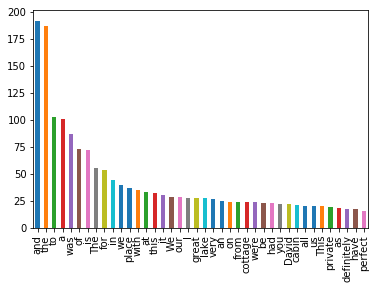

In [145]:
top_common = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:40]
top_common.plot(kind = 'bar')

In [148]:
top_uncommon =  pd.Series(' '.join(data['Reviews']).split()).value_counts()[-20:]
top_uncommon

supper          1
Perfect         1
filled          1
great.          1
separate        1
provided        1
michabo         1
view.           1
Warming         1
heart           1
doesn’t         1
imagine.        1
Perhaps         1
bunkie.Sauna    1
tidy            1
expected,       1
doubles         1
world,          1
beat            1
fridge.         1
dtype: int64

In [149]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


# Removing Stop Words

Stop words are not keywords.

In [162]:
pd.options.display.max_colwidth = 1000
#removing punctuations
data['Processed'] = data['Reviews'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) 

#changing all characters to lowercase
data['Processed'] = data['Processed'].apply(lambda x: x.lower()) 

#removing texts
data['Processed'] = data['Processed'].apply(lambda x: re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", x))

# remove special characters and digits
data['Processed'] = data['Processed'].apply(lambda x: re.sub("(\\d|\\W)+"," ",x))
data['Processed'].values

array(['incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning ',
       'this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world clean and comfortable an all round amazing trip ',
       'our stay at michabo lake was fantastic the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing it was very private we had plenty of cooking amenities and the hot water from the sauna was great for showers and doing dishes all in all a very relaxing weekend at the lake ',
       'this is an outstanding place it 

In [150]:
##In built list of stopwords in the English Language
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["enough", "make", "come", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [174]:
##Convert from String to List
data['Keywords'] = data['Processed'].apply(lambda x: x.split())

##Stemming
ps=PorterStemmer()
#Lemmatisation
lem = WordNetLemmatizer()

dictionary = []
def function(x):
    words = []
    for word in x: 
        if not word in stop_words: 
            words.append(lem.lemmatize(word))
            dictionary.append(lem.lemmatize(word))
    return words
data['Keywords'] = data['Keywords'].apply(lambda x: function(x))
data.head()
#text = " ".join(text)
#corpus.append(text)
#data.head()

,Reviews,Word Count,Sentence Count,Processed,Keywords
0,Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!,80,9,incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning,"[incredibly, unique, beautiful, spot, property, like, private, ideal, modest, outdoorsman, enough, touch, make, comfortable, stay, lake, sauna, relaxing, definitely, enjoyed, cabin, well, equipped, come, chopped, firewood, stay, easy, dave, great, host, phone, call, away, answer, question, definitely, consider, returning]"
1,This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.,24,3,this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world clean and comfortable an all round amazing trip,"[cottage, offer, rare, opportunity, experience, canadian, beauty, without, intrusion, outside, world, clean, comfortable, round, amazing, trip]"
2,"Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.",60,6,our stay at michabo lake was fantastic the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing it was very private we had plenty of cooking amenities and the hot water from the sauna was great for showers and doing dishes all in all a very relaxing weekend at the lake,"[stay, michabo, lake, fantastic, cabin, bunkie, tidy, bed, comfortable, lake, great, swimming, fishing, private, plenty, cooking, amenity, hot, water, sauna, great, shower, dish, relaxing, weekend, lake]"
3,"This is an OUTSTANDING place! It is extremely rare that you can find such a secluded place with all lake just for you. The cottage actually has everything that you need, it accomdates 10 people comfortably, and everything is in good condition. The shower is outside the sauna, but really the water in the lake is so warm, that we never used that shower. The forest around the cottage is amazing and full of life. I would highly recommend this place to anyone. Also, please take into account that you need to have enough space in your trunk to pick up your garbage (the nearest landfill is the West Guilford Landfill site), don't repeat our mistake. This is an extraordinary getaway for people who want to retreat from busy city life.",131,8,this is an outstanding place it is extremely rare that you can find such a secluded place with all lake just for you the cottage actually has everything that you need it accomdates people comfortably and everything is in good condition the shower is outside the sauna but really the water in the lake is so warm that we never used that shower the forest around the cottage is amazing and full of life i would highly recommend this place to anyone also please take into account that you need to have enough space in your trunk to pick up your garbage the nearest landfill is the west guilford landfill site don t repeat our mista

In [186]:
dict_df = pd.DataFrame(dictionary, columns = ['Keywords'])
dict_df['Keywords'].value_counts()[:20]

lake          46
place         43
david         41
cottage       36
great         31
stay          29
private       28
cabin         27
amazing       22
sauna         22
back          22
beautiful     21
dave          21
experience    21
u             21
property      19
definitely    19
perfect       18
time          18
host          17
Name: Keywords, dtype: int64

In [177]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(dictionary)) #enter the list with the words here
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

ModuleNotFoundError: No module named 'wordcloud'

In [167]:
corpus = []
for i in range(0, 60):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Reviews'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [153]:
corpus

['incredibly unique beautiful spot property like private ideal modest outdoorsman enough touch make comfortable stay lake sauna relaxing definitely enjoyed cabin well equipped come chopped firewood stay easy dave great host phone call away answer question definitely consider returning',
 'cottage offer rare opportunity experience canadian beauty without intrusion outside world clean comfortable round amazing trip',
 'stay michabo lake fantastic cabin bunkie tidy bed comfortable lake great swimming fishing private plenty cooking amenity hot water sauna great shower dish relaxing weekend lake',
 'outstanding place extremely rare find secluded place lake cottage actually everything need accomdates people comfortably everything good condition shower outside sauna really water lake warm never used shower forest around cottage amazing full life would highly recommend place anyone also please take account need enough space trunk pick garbage nearest landfill west guilford landfill site repeat